In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [3]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 56 (delta 23), reused 22 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 29.78 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [4]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   data	 dataset_cleaner.ipynb	 README.md   teamnotes


## Query

In [5]:
merged = pd.read_csv("data/merged_data.csv")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic           

In [6]:
query = merged[merged["Category"] == "Cardiovascular Diseases"][["Topic", "Overall_Overall", "NO2 Mean", "O3 Mean"]]
query

,Topic,Overall_Overall,NO2 Mean,O3 Mean
0,Acute Myocardial Infarction (Heart Attack),17.8,11.931810,0.028143
1,Coronary Heart Disease,3.9,11.931810,0.028143
2,Major Cardiovascular Disease,8.5,11.931810,0.028143
3,Stroke,3.0,11.931810,0.028143
11,Acute Myocardial Infarction (Heart Attack),6.5,7.876934,0.028954
...,...,...,...,...
1822,Stroke,2.7,8.434649,0.023791
1830,Acute Myocardial Infarction (Heart Attack),4.7,8.413987,0.029742
1831,Coronary Heart Disease,3.4,8.413987,0.029742
1832,Major Cardiovascular Disease,7.7,8.413987,0.029742


## EDA

In [7]:
query.describe()

,Overall_Overall,NO2 Mean,O3 Mean
count,748.000000,748.000000,748.000000
mean,5.331952,8.628960,0.026967
std,3.262410,2.479306,0.003065
min,1.800000,1.782609,0.014166
25%,3.300000,7.151438,0.025398
50%,4.300000,8.434649,0.026989
75%,6.600000,10.140852,0.028721
max,31.250000,15.009458,0.041500


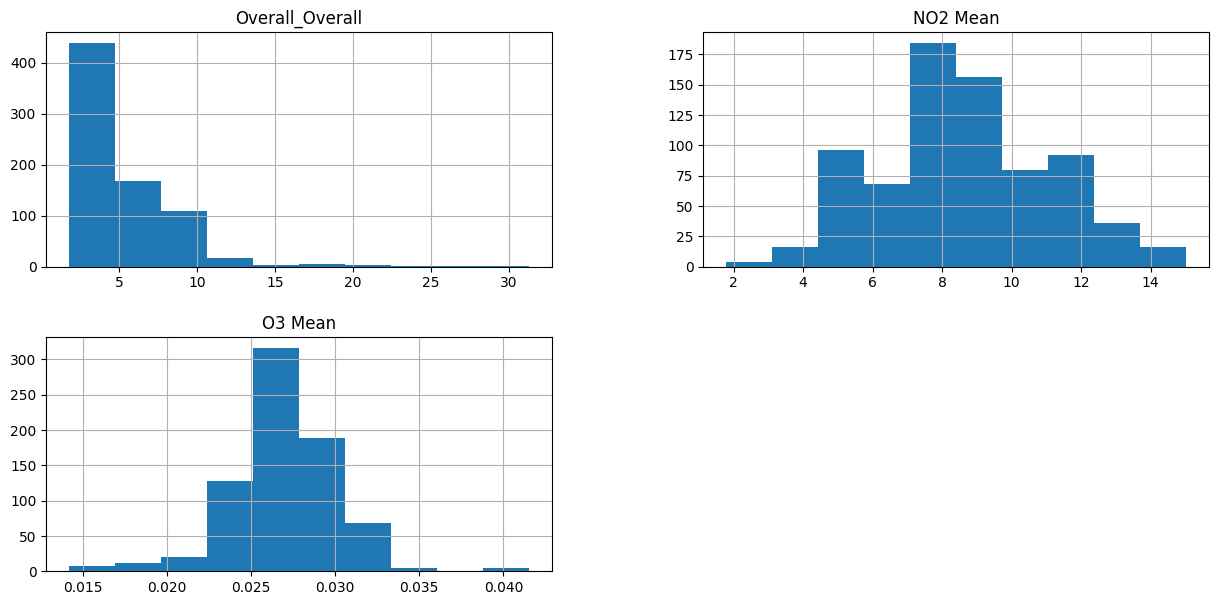

In [8]:
query.hist(figsize=(15,7))
plt.show()

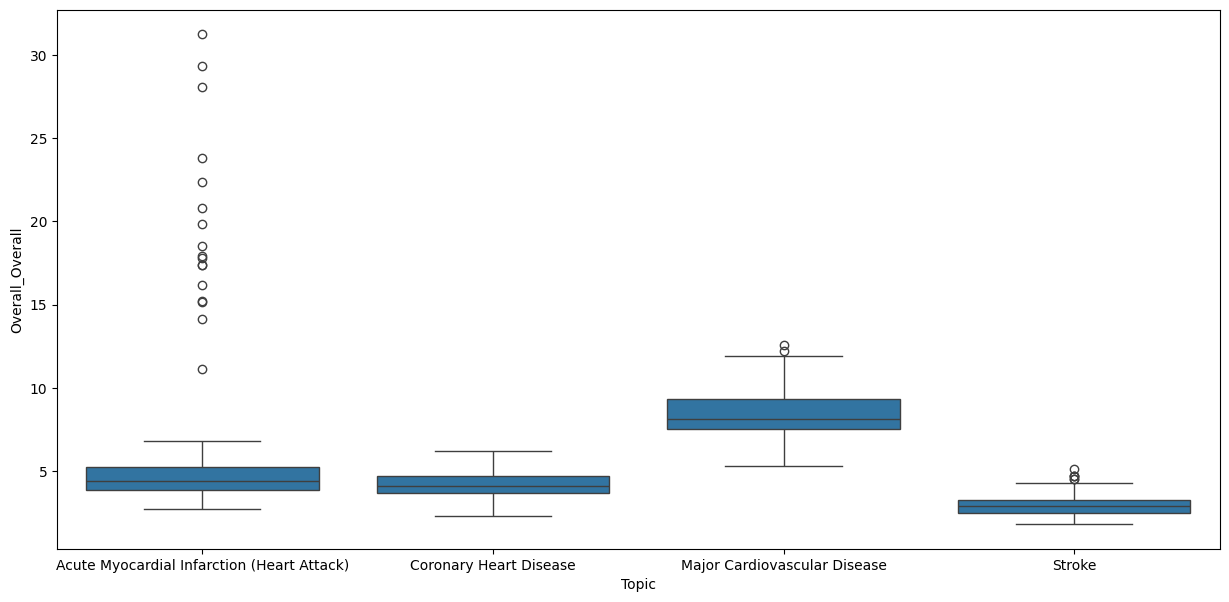

In [9]:
plt.figure(figsize= (15,7))
sns.boxplot(x="Topic", y = "Overall_Overall", data = query)
plt.show()

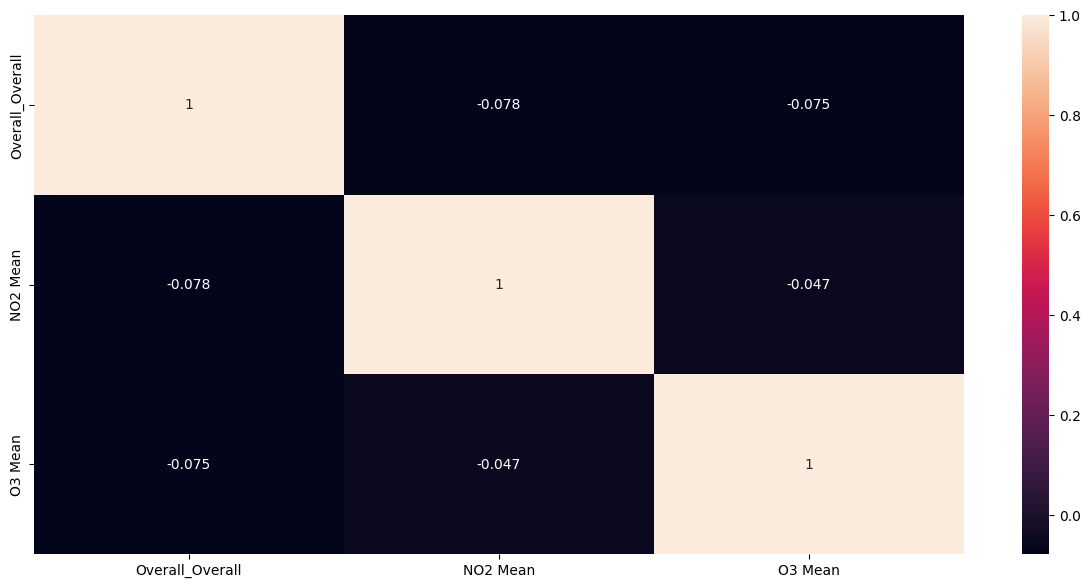

In [10]:
plt.figure(figsize=(15, 7))
sns.heatmap(query[['Overall_Overall', 'NO2 Mean', 'O3 Mean']].corr(), annot=True)
plt.show()


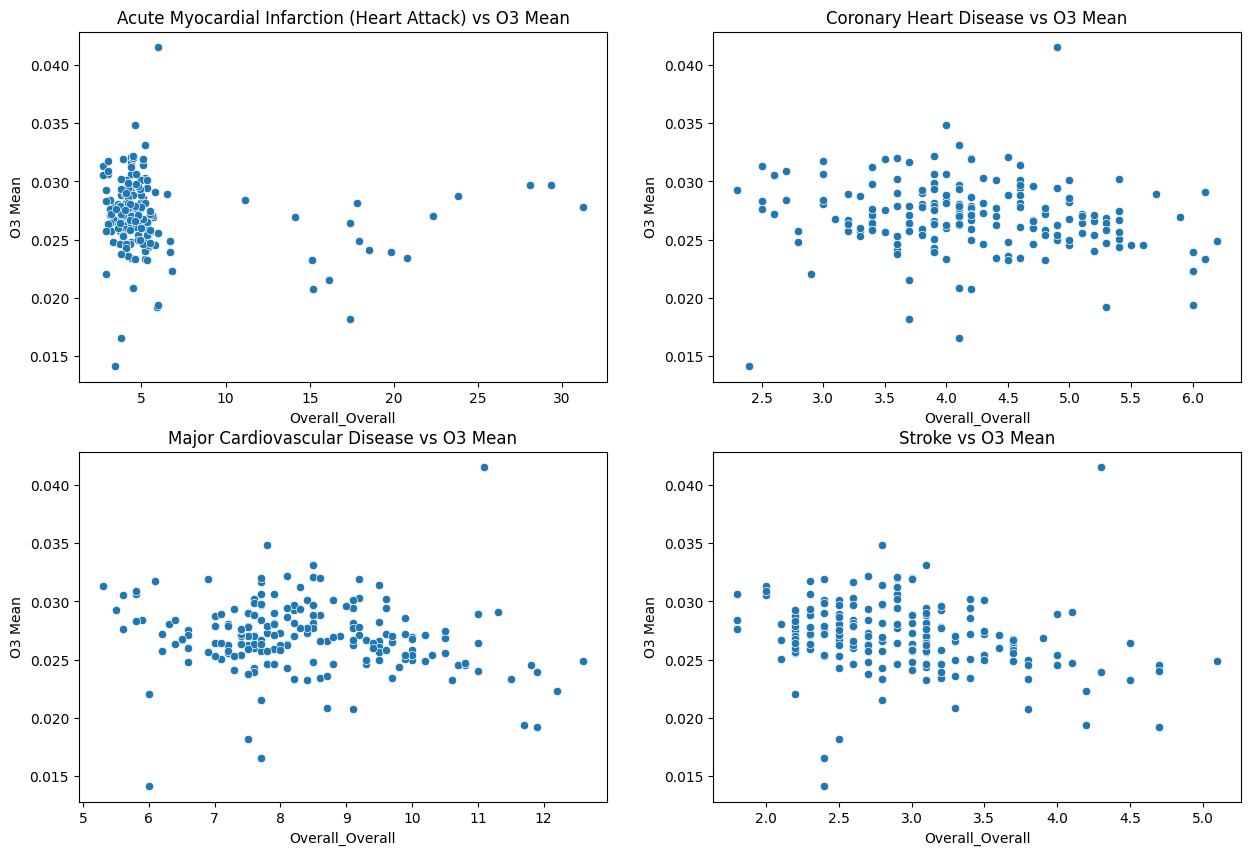

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs O3 Mean")
sns.scatterplot(x = "Overall_Overall", y = "O3 Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

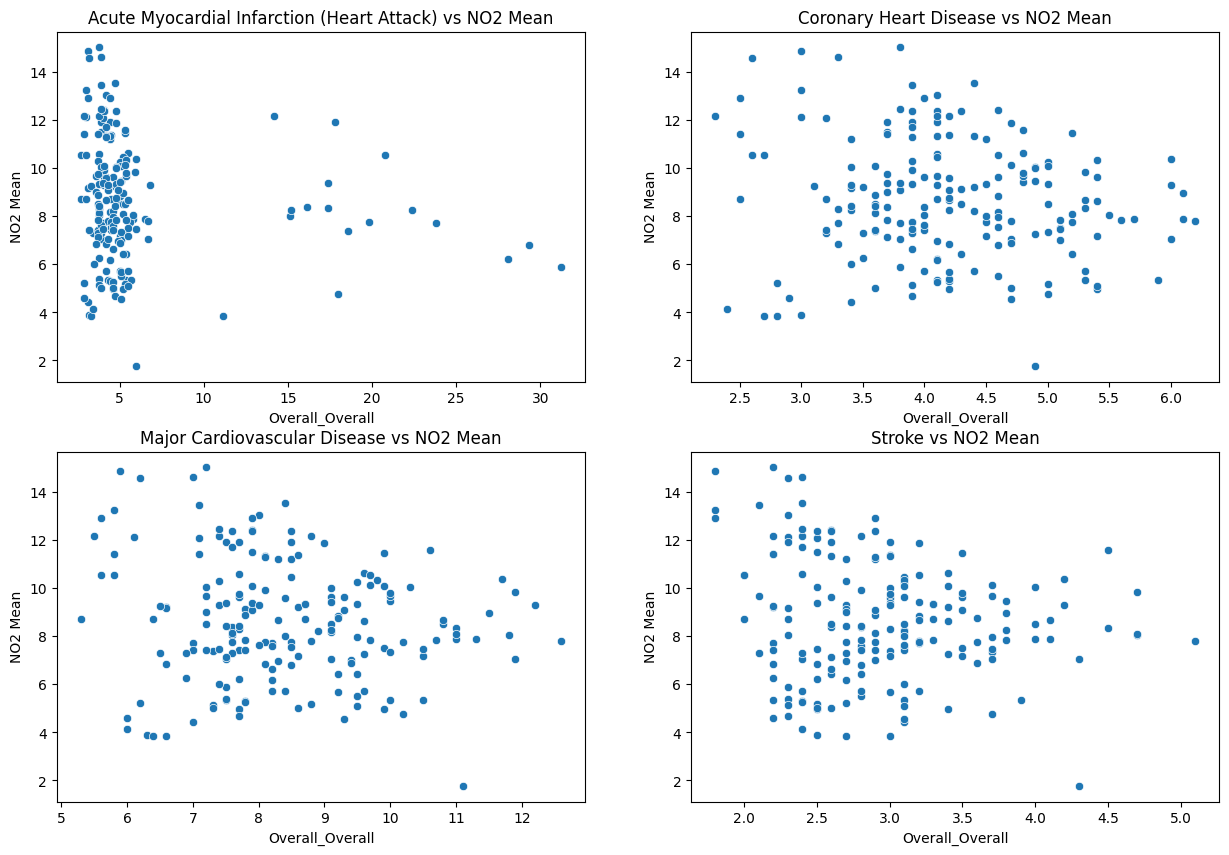

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Acute Myocardial Infarction (Heart Attack) vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Acute Myocardial Infarction (Heart Attack)'])
plt.subplot(2, 2, 2)
plt.title("Coronary Heart Disease vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Coronary Heart Disease'])
plt.subplot(2, 2, 3)
plt.title("Major Cardiovascular Disease vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Major Cardiovascular Disease'])
plt.subplot(2, 2, 4)
plt.title("Stroke vs NO2 Mean")
sns.scatterplot(x = "Overall_Overall", y = "NO2 Mean", data = query[query['Topic'] == 'Stroke'])
plt.show()

## Regression Models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i][['NO2 Mean', 'O3 Mean']], query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc = pd.DataFrame({'Topic': idx})
acc["LR_RMSE"] = rmse
acc["LR_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2
0,Acute Myocardial Infarction (Heart Attack),3.580456,0.097191
1,Coronary Heart Disease,0.753268,0.043494
2,Major Cardiovascular Disease,1.339371,0.050814
3,Stroke,0.551112,0.012567


In [34]:
from sklearn.tree import DecisionTreeRegressor
idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i][['NO2 Mean', 'O3 Mean']], query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=42)
  model = DecisionTreeRegressor()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["DT_RMSE"] = rmse
acc["DT_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2
0,Acute Myocardial Infarction (Heart Attack),3.580456,0.097191,5.093682,-0.827186
1,Coronary Heart Disease,0.753268,0.043494,0.952421,-0.529138
2,Major Cardiovascular Disease,1.339371,0.050814,1.721459,-0.567988
3,Stroke,0.551112,0.012567,0.721110,-0.690562


In [35]:
from sklearn.ensemble import RandomForestRegressor
idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i][['NO2 Mean', 'O3 Mean']], query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=42)
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["RF_RMSE"] = rmse
acc["RF_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2,RF_RMSE,RF_R2
0,Acute Myocardial Infarction (Heart Attack),3.580456,0.097191,5.093682,-0.827186,4.202055,-0.243491
1,Coronary Heart Disease,0.753268,0.043494,0.952421,-0.529138,0.794626,-0.064425
2,Major Cardiovascular Disease,1.339371,0.050814,1.721459,-0.567988,1.473780,-0.149250
3,Stroke,0.551112,0.012567,0.721110,-0.690562,0.607456,-0.199660


In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
idx = []
rmse = []
r2 = []

for i in query['Topic'].unique():
  X_train, X_test, y_train, y_test = train_test_split(query[query['Topic'] == i][['NO2 Mean', 'O3 Mean']], query[query['Topic'] == i][['Overall_Overall']].values.ravel(), test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model = SVR()
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  idx.append(i)
  rmse.append((mean_squared_error(y_test, y_pred))**0.5)
  r2.append(r2_score(y_test, y_pred))

acc["SVR_RMSE"] = rmse
acc["SVR_R2"] = r2
acc

,Topic,LR_RMSE,LR_R2,DT_RMSE,DT_R2,RF_RMSE,RF_R2,SVR_RMSE,SVR_R2
0,Acute Myocardial Infarction (Heart Attack),3.580456,0.097191,5.093682,-0.827186,4.202055,-0.243491,3.851641,-0.044746
1,Coronary Heart Disease,0.753268,0.043494,0.952421,-0.529138,0.794626,-0.064425,0.770843,-0.001661
2,Major Cardiovascular Disease,1.339371,0.050814,1.721459,-0.567988,1.473780,-0.149250,1.361344,0.019415
3,Stroke,0.551112,0.012567,0.721110,-0.690562,0.607456,-0.199660,0.518312,0.126607


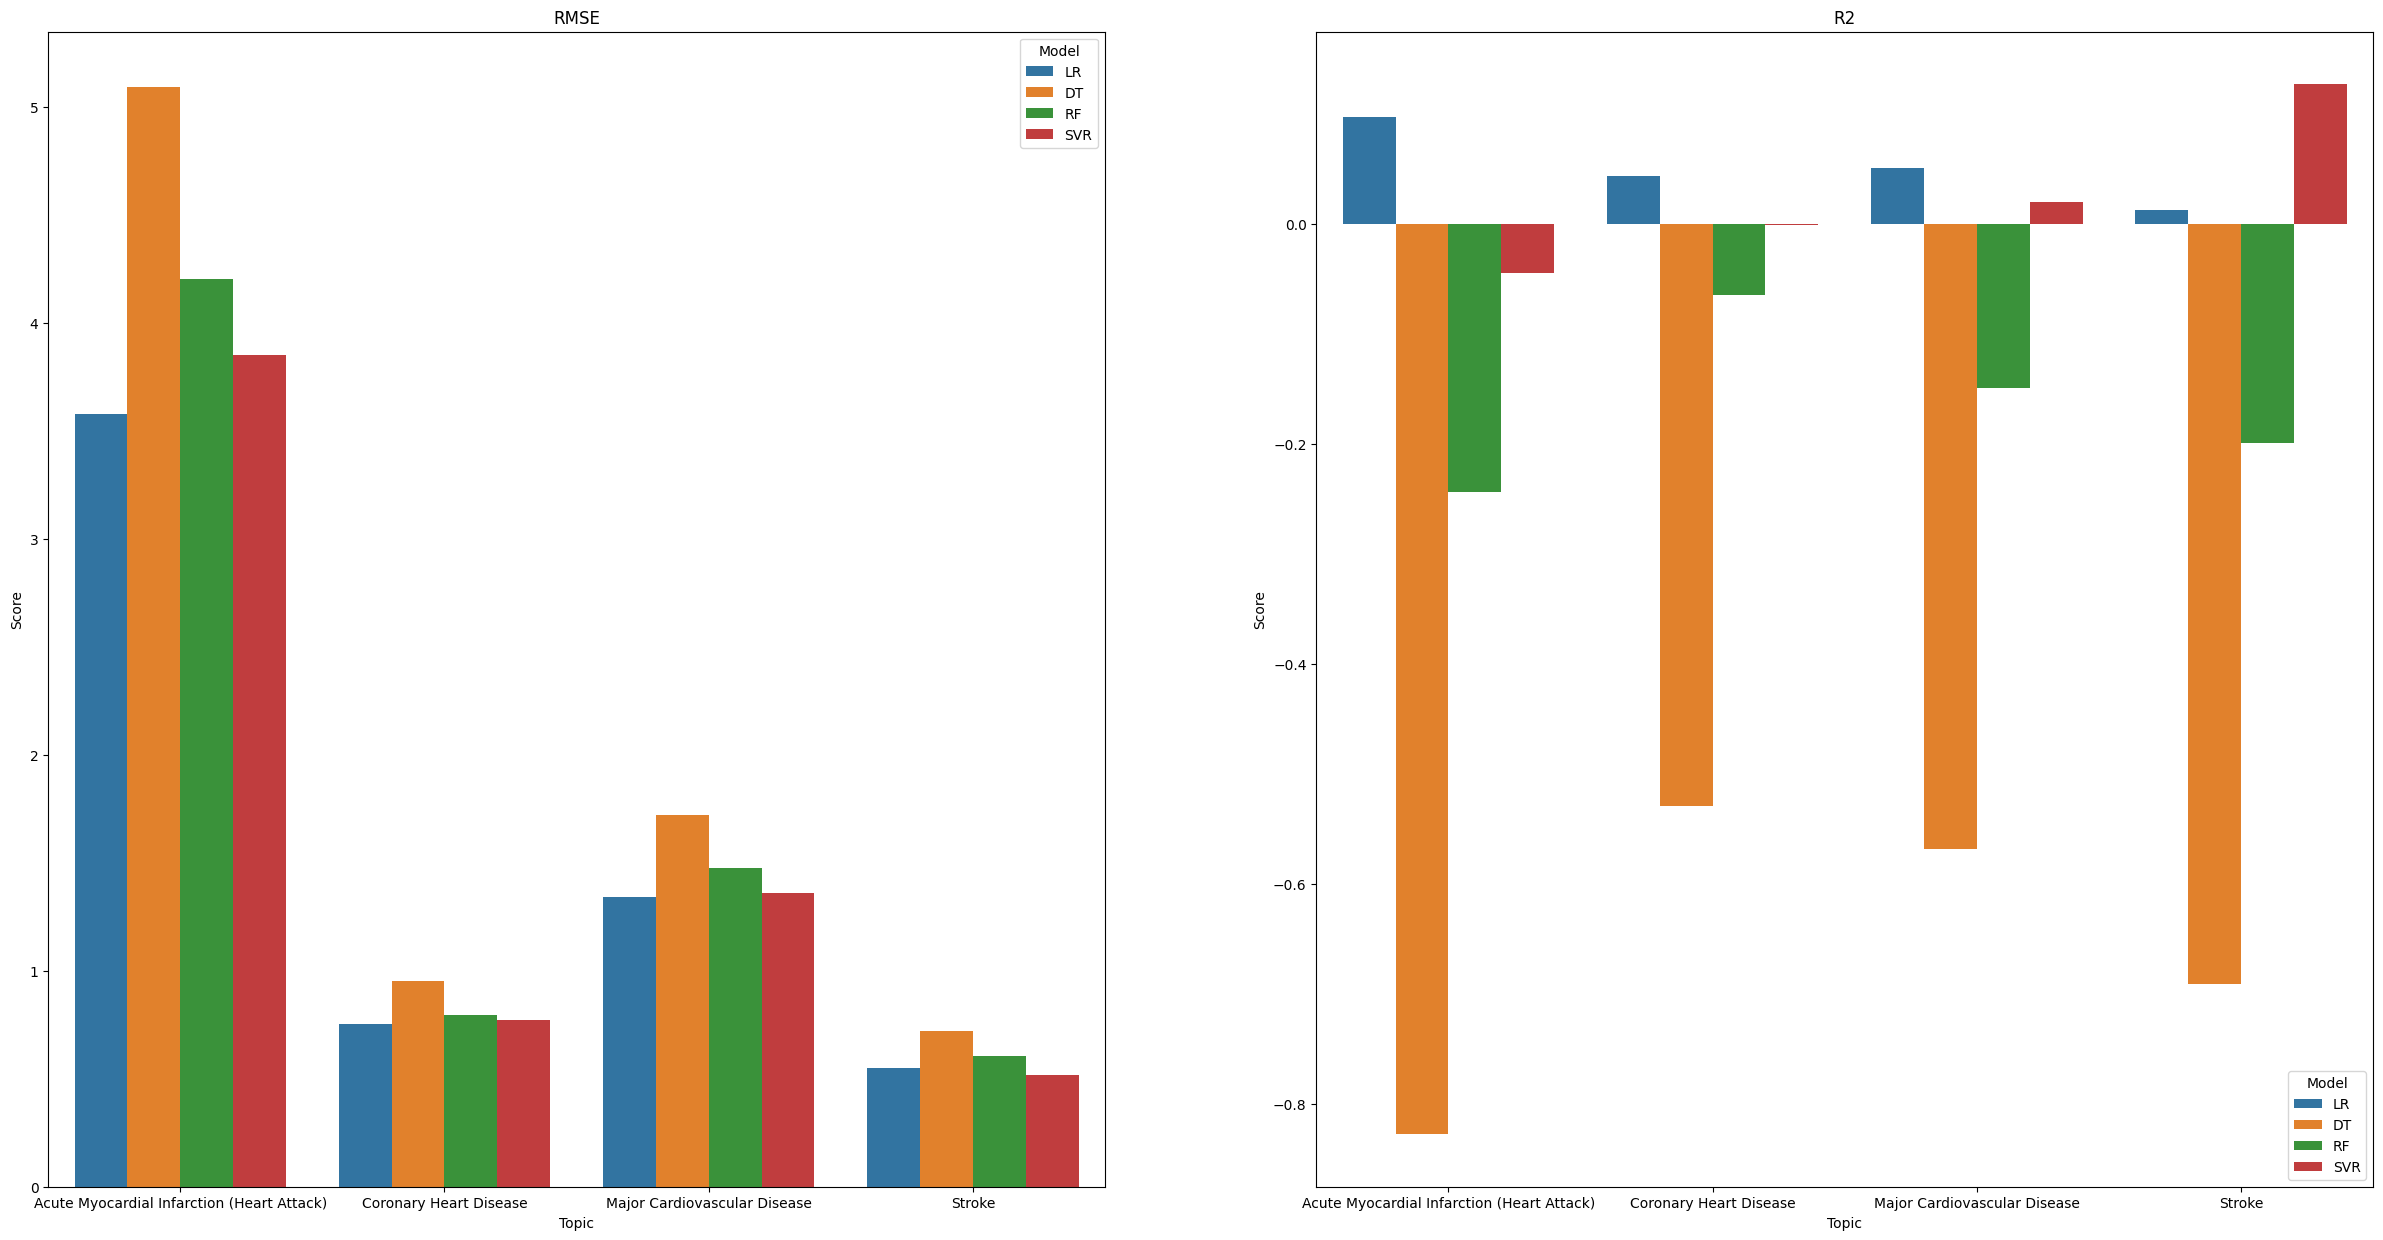

In [37]:
melt = acc.melt(id_vars=["Topic"], var_name="Model_Metric", value_name="Score")
melt[['Model', 'Metric']] = melt['Model_Metric'].str.split('_', expand=True)
melt = melt.drop(columns=['Model_Metric'])
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.title("RMSE")
sns.barplot(x = "Topic", y = "Score", data = melt[melt['Metric'] == "RMSE"] , hue =  "Model")
plt.subplot(1, 2, 2)
plt.title("R2")
sns.barplot(x = "Topic", y = "Score", data = melt[melt['Metric'] == "R2"] , hue =  "Model")
plt.show()